In [5]:
import json
import pandas as pd
from pathlib import Path

from modules.network import (
    calc_mean_std_per_epoch,
    plot_two_metrics
)

In [6]:
path_to_logs = Path(Path.cwd() / 'logs')
log_dir = path_to_logs / 'fit'
model_name = 'ANN_512x5_250e'

In [7]:
# Load existing history if it exists
history_filename = log_dir / model_name / 'training_history.json'
if history_filename.exists():
    with open(history_filename, 'r') as f:
        existing_history = json.load(f)
else:
    print('No history')

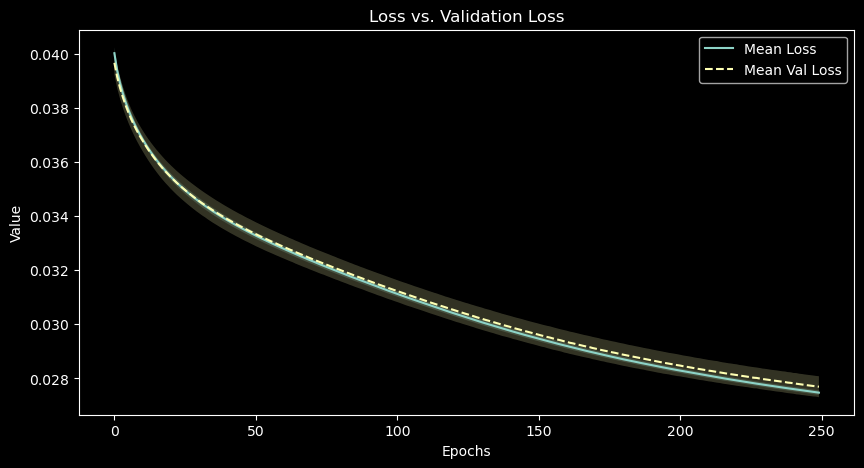

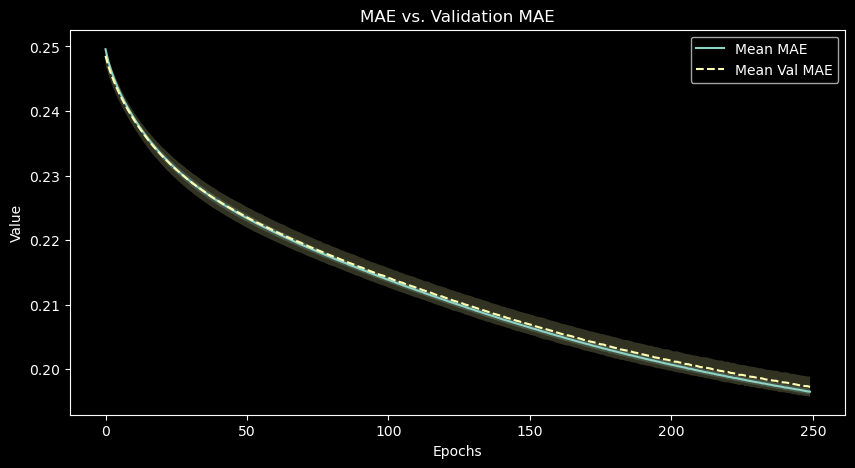

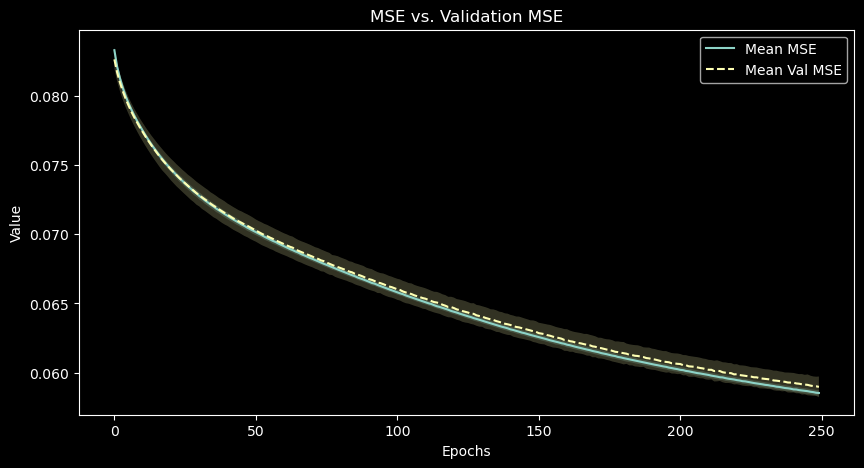

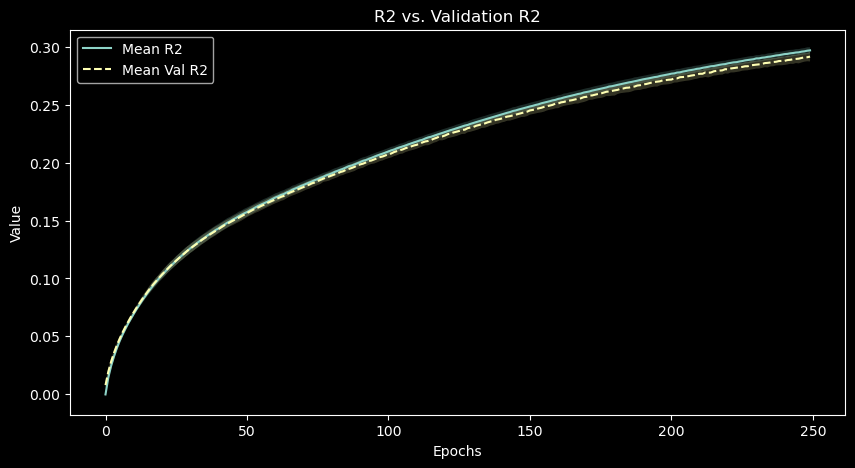

In [8]:
history_df = pd.DataFrame(existing_history)
if 'GRU' in model_name:
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['mean_absolute_error', 'val_mean_absolute_error']].plot()
    history_df.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot()
    history_df.loc[:, ['r_squared', 'val_r_squared']].plot()
    print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
elif 'ANN' in model_name:
    # Plot loss and val_loss
    mean_loss, std_loss = calc_mean_std_per_epoch(history_df['loss'])
    mean_val_loss, std_val_loss = calc_mean_std_per_epoch(history_df['val_loss'])
    epochs = range(len(mean_loss))
    plot_two_metrics(epochs, mean_loss, std_loss, 'Loss', mean_val_loss, std_val_loss, 'Val Loss', 'Loss vs. Validation Loss')

    # Plot mean_absolute_error and val_mean_absolute_error
    mean_mae, std_mae = calc_mean_std_per_epoch(history_df['mean_absolute_error'])
    mean_val_mae, std_val_mae = calc_mean_std_per_epoch(history_df['val_mean_absolute_error'])
    epochs = range(len(mean_mae))
    plot_two_metrics(epochs, mean_mae, std_mae, 'MAE', mean_val_mae, std_val_mae, 'Val MAE', 'MAE vs. Validation MAE')
    
    # Plot mean_squared_error and val_mean_squared_error
    mean_mse, std_mse = calc_mean_std_per_epoch(history_df['mean_squared_error'])
    mean_val_mse, std_val_mse = calc_mean_std_per_epoch(history_df['val_mean_squared_error'])
    epochs = range(len(mean_mse))
    plot_two_metrics(epochs, mean_mse, std_mse, 'MSE', mean_val_mse, std_val_mse, 'Val MSE', 'MSE vs. Validation MSE')

    # Plot r2 and val_r2
    mean_r2, std_r2 = calc_mean_std_per_epoch(history_df['r_squared'])
    mean_val_r2, std_val_r2 = calc_mean_std_per_epoch(history_df['val_r_squared'])
    epochs = range(len(mean_r2))
    plot_two_metrics(epochs, mean_r2, std_r2, 'R2', mean_val_r2, std_val_r2, 'Val R2', 'R2 vs. Validation R2')